<p style="text-align: center; font-size: 300%"> Introduction to Programming in Python </p>
<img src="img/logo.svg" alt="LOGO" style="display:block; margin-left: auto; margin-right: auto; width: 30%;">

### Pandas Dataframes
#### Introduction to Pandas
* `pandas` (from *p*anel *d*ata) is another fundamental package ([user quide](http://pandas.pydata.org/pandas-docs/stable/overview.html)).
* It provides a number of datastructures (*series*, *dataframes*, and *panels*) designed for storing observational data, and powerful methods for manipulating (*munging*, or *wrangling*) these data.
* It is usually imported as `pd`:

In [1]:
import pandas as pd

* Pandas is incredibly powerful; we will only scratch the surface here. Working with it will require a lot of googling.

#### Series
* A pandas `Series` is essentially a NumPy array, but not necessarily indexed with integers.

In [2]:
pop = pd.Series([5.7, 82.7, 17.0], name='Population'); pop  # the descriptive name is optional

0     5.7
1    82.7
2    17.0
Name: Population, dtype: float64

* The difference is that the index can be anything, not just a list of integers:

In [3]:
pop.index=['DK', 'DE', 'NL']

* The index can be used for indexing (duh...):

In [4]:
pop['NL']

17.0

* The index is preserved when operating on a `series`:

In [5]:
gdp = pd.Series([3494.898, 769.930], name='Nominal GDP in Billion USD', index=['DE', 'NL']); gdp

DE    3494.898
NL     769.930
Name: Nominal GDP in Billion USD, dtype: float64

In [6]:
gdp / pop

DE    42.259952
DK          NaN
NL    45.290000
dtype: float64

* One advantage of a `Series` compared to NumPy arrays is that they can handle missing data, represented as `NaN` (not a number).

#### Dataframes

* A `DataFrame` is a collection of `Series` with a common index (which labels the rows).

In [7]:
data = pd.concat([gdp, pop], axis=1, sort=False); data  # concatenate two Series to a DataFrame.

,Nominal GDP in Billion USD,Population
DE,3494.898,82.7
NL,769.930,17.0
DK,NaN,5.7


* Columns are indexed by column name:

In [8]:
data.columns

Index(['Nominal GDP in Billion USD', 'Population'], dtype='object')

In [9]:
data['Population']  # data.Population works too

DE    82.7
NL    17.0
DK     5.7
Name: Population, dtype: float64

* Rows are indexed with the `loc` method:

In [10]:
data.loc['NL']

Nominal GDP in Billion USD    769.93
Population                     17.00
Name: NL, dtype: float64

* Unlike arrays, dataframes can have columns with different datatypes.
* There are different ways to add columns. One is to just assign to a new column:

In [11]:
data['Language'] = ['German', 'Danish', 'Dutch']  # add a new column from a list

* To add rows, use `loc` or `append`:

In [12]:
print(data.loc["DE"])
data.loc['AT'] = [386.4, 8.7, 'German']  # add a row with index 'AT'.
s = pd.DataFrame([[511.0, 9.9, 'Swedish']], index=['SE'], columns=data.columns)
data = data.append(s)  # add a row by appending another dataframe. May create duplicates.
data

Nominal GDP in Billion USD    3494.898
Population                        82.7
Language                        German
Name: DE, dtype: object


,Nominal GDP in Billion USD,Population,Language
DE,3494.898,82.7,German
NL,769.930,17.0,Danish
DK,NaN,5.7,Dutch
AT,386.400,8.7,German
SE,511.000,9.9,Swedish


* The `dropna` method can be used to delete rows with missing values:

In [13]:
data = data.dropna(); data

,Nominal GDP in Billion USD,Population,Language
DE,3494.898,82.7,German
NL,769.930,17.0,Danish
AT,386.400,8.7,German
SE,511.000,9.9,Swedish


* Useful methods for obtaining summary information about a dataframe are `mean`, `std`, `info`, `describe`, `head`, and `tail`.

In [28]:
data.describe()

,Nominal GDP in Billion USD,Population
count,4.000000,4.000000
mean,1290.557000,29.575000
std,1478.217475,35.605559
min,386.400000,8.700000
25%,479.850000,9.600000
50%,640.465000,13.450000
75%,1451.172000,33.425000
max,3494.898000,82.700000


In [15]:
data.head()  # show the first few rows; data.tail shows the last few

,Nominal GDP in Billion USD,Population,Language
DE,3494.898,82.7,German
NL,769.930,17.0,Danish
AT,386.400,8.7,German
SE,511.000,9.9,Swedish


* To save a dataframe to disk as a csv file, use

In [16]:
data.to_csv('myfile.csv')  # to_excel exists as well.

* To load data into a dataframe, use `pd.read_csv`:

In [17]:
pd.read_csv('myfile.csv', index_col=0)

,Nominal GDP in Billion USD,Population,Language
DE,3494.898,82.7,German
NL,769.930,17.0,Danish
AT,386.400,8.7,German
SE,511.000,9.9,Swedish


In [18]:
import os
os.remove('myfile.csv')  # clean up

Usually, you won't be creating dataframes from scratch; rather, they result from obtaining data from somewhere. E.g., Pandas can open CSV files directly from a URL, resulting in a dataframe:

In [19]:
URL = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
df = pd.read_csv(URL)
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


## Split-Apply-Combine
* An important concept in working with data is the "split-apply-combine" paradigm: split the data according to some criterion, apply an operation to it, and then combine the results into a new dataframe.  
* Suppose the CoViD data above only contained the daily new cases, not the total number of cases. How could we compute the total number of cases?
* Answer: split the data by country, sum the daily new cases, and then combine the results into a new dataframe.

* In Pandas, the paradigm corresponds to `groupby`:

In [20]:
df.groupby("location").new_cases.sum()



location
Afghanistan             178521.0
Africa                11598232.0
Albania                 274535.0
Algeria                 265746.0
Andorra                  40709.0
                        ...     
Wallis and Futuna          454.0
World                504821021.0
Yemen                    11819.0
Zambia                  318640.0
Zimbabwe                247303.0
Name: new_cases, Length: 242, dtype: float64

## Plotting
Pandas can directly be used for plotting. More advanced funtionality requires `matplotlib` (more on that below).

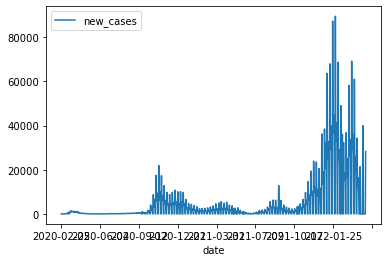

In [21]:
%matplotlib inline 
sw = df.loc[df['location'] == "Switzerland"]
sw.plot(x="date", y="new_cases");

* The first line is an [ipython magic](http://ipython.readthedocs.io/en/stable/interactive/magics.html). It makes plots appear inline in the notebook.

* Advanced plotting requires the `matplotlib` library ([user guide](https://matplotlib.org/users/index.html)), which is inspired by the plotting facilities of Matlab&reg;.
* Its main plotting facilities reside in its `pyplot` module. It is usually imported as

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

`matplotlib` enables us to make the above plot prettier:

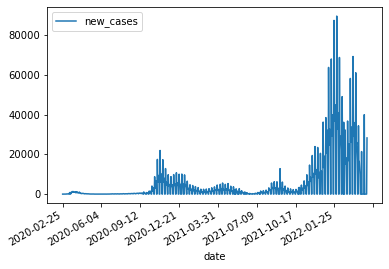

In [23]:
sw = df.loc[df['location'] == "Switzerland"]
sw.plot(x="date", y="new_cases")
plt.gcf().autofmt_xdate()

* The `seaborn` library ([user guide](https://seaborn.pydata.org/tutorial.html)) provides higher-level statistical visualizations:

In [24]:
import seaborn as sns

* I will only give a brief introduction to matplotlib here. The fundamental object in matplotlib is a `figure`, inside of which reside `subplots` (or `axes`).
* To create a new figure, add an axis, and plot to it:

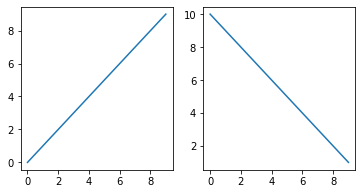

In [25]:
# with the inline backend, these need to be in the same cell.
fig = plt.figure(figsize=(6,3)) # create a new empty figure object. size is optional.
ax1 = fig.add_subplot(121) # layout: (1x2). ax1 is the top left one
ax2 = fig.add_subplot(122)
ax1.plot(range(10))
ax2.plot(range(10, 0, -1));

* By default, matplotlib plots into the current axis, creating one (and a figure) if needed. Using the convenience method `subplot`, this allows us to achieve the same without explicit reference to figures and axes:

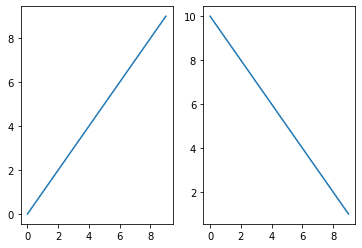

In [26]:
plt.subplot(121)
plt.plot(range(10))
plt.subplot(122) 
plt.plot(range(10, 0, -1));

* To plot two vectors $x$ and $y$ against each other:

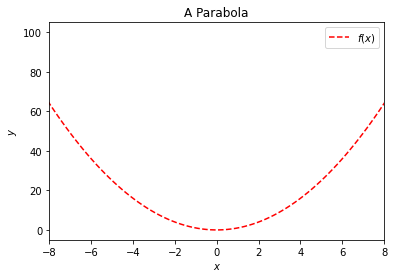

In [29]:
import numpy as np
x = np.linspace(-10, 10, 100)
y = x**2
plt.plot(x,y,'r--') # dashed red line
plt.xlabel('$x$') # math (LaTeX) equations can be included by enclosing in $$.
plt.ylabel('$y$')
plt.title('A Parabola')
plt.legend(['$f(x)$']) # expects a list of strings
plt.xlim(xmin=-8, xmax=8); # axis limits
#plt.savefig('filename.svg') # save the plot to disk

### A more advanced example: quantiles of the normal distribution

In [30]:
from matplotlib.patches import Polygon
import scipy.stats as stats
a, b, c = -5, 5, stats.norm.ppf(0.05)
x = np.linspace(a, b, 500)
y = stats.norm.pdf(x)
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111)
plt.plot(x, y, 'b', linewidth=2)
plt.ylim(ymin=0)
plt.xlim(xmin=a, xmax=b)
Ix = np.linspace(a, c)
Iy = stats.norm.pdf(Ix)
verts = [(a, 0)] + list(zip(Ix, Iy)) + [(c, 0)]
poly = Polygon(verts, facecolor='0.7', edgecolor='0.5')
ax.add_patch(poly)
ax.annotate(
            '$2.5\%$', xy=(-2, 0.025), xytext=(-3, 0.1),
            arrowprops=dict(width=.5),
            )
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
ax.set_xticks([c, 0])
ax.set_xticklabels(['$-1.96$', '0'])
ax.set_yticks([])
plt.savefig('img/var.svg')
plt.close()

<img src="img/var.svg" alt="VaR" style="display:block; margin-left: auto; margin-right: auto; width: 80%;">

## Working with Time Series
### Data Types

* Different data types for representing times and dates exist in Python.
* The most basic one is `datetime` from the eponymous package:

In [31]:
from datetime import datetime
datetime.today()

datetime.datetime(2022, 4, 20, 15, 52, 38, 516809)

* `datetime` objects can be created from strings using `strptime` and a format specifier:

In [32]:
datetime.strptime('2017-03-31', '%Y-%m-%d')

datetime.datetime(2017, 3, 31, 0, 0)

* Pandas uses `Timestamps` instead of `datetime` objects. Unlike timestamps, they store frequency and time zone information. The two can mostly be used interchangeably.

In [33]:
pd.Timestamp('2017-03-31')

Timestamp('2017-03-31 00:00:00')

* A time series is a `Series` with a special index, called a `DatetimeIndex`; essentially an array of `Timestamp`s.
* It can be created using the `date_range` function.

In [34]:
import numpy as np
myindex = pd.date_range(end=pd.Timestamp.today(), normalize=True, periods=100, freq='B')
P = 20 + np.random.randn(100).cumsum()  # make up some share prices.
aapl = pd.Series(P, name="AAPL", index=myindex)
aapl.tail()

2022-04-14    28.143104
2022-04-15    28.037252
2022-04-18    28.914469
2022-04-19    28.206539
2022-04-20    28.905343
Freq: B, Name: AAPL, dtype: float64

* As a convenience, Pandas allows indexing timeseries with date strings:

In [35]:
aapl['4/11/2022']

26.115567536847927

# Reading (recommended)
* https://python-course.eu/numerical-programming/ 23-28, 32-34

# Homework

https://github.com/guipsamora/pandas_exercises/tree/master/01_Getting_%26_Knowing_Your_Data/Chipotle